<a href="https://colab.research.google.com/github/DarshanPatel0919/Machine-Learning/blob/master/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

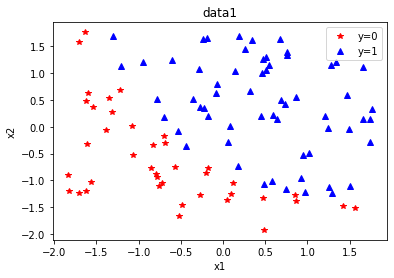

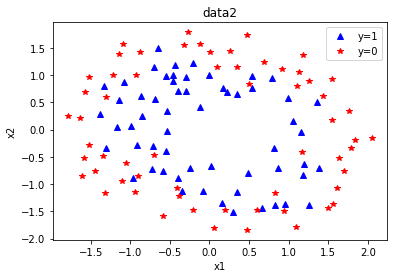

In [0]:
################## Q.1 ####################

import numpy as np
import pylab as plt
import pandas as pd
import random as rd
examples=2
d=[pd.read_csv('data'+str(ex+1)+'.csv') for ex in range(examples)]
x,y=[np.array(list(zip(d[ex]['x1'],d[ex]['x2']))) for ex in range(examples)],[np.array(d[ex]['y']) for ex in range(examples)]

for ex in range(examples):#examples
    xe=np.array(x[ex])
    ye=np.array(y[ex])
    cls=(x[ex].shape)[1]
    for c in range(cls):
        xe[:,c]=(xe[:,c]-np.mean(xe[:,c]))/np.std(xe[:,c])    
    color=['r*','b^']
    my_label=['y='+str(i) for i in range(cls)]
    for i in range(len(xe)):
        plt.plot(xe[i][0],xe[i][1],color[ye[i]],label=my_label[y[ex][i]])
        my_label[y[ex][i]]='_nolegend_'
    plt.legend(loc='best')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('data'+str(ex+1))
    plt.show()

    


Total iteraions =  100000


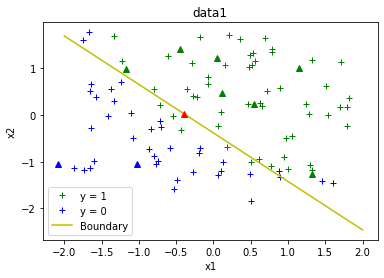

Total Errors in 10% examples:  10.0 %
Total Errors in all examples:  11.0 %


In [0]:
################## Q.2a ####################

import numpy as np
import pylab as plt
import pandas as pd
import random as rd
dt=1e-9

def h(t,x):
    return 1/(1+(np.exp(-np.matmul(t,np.transpose(x)))))

def gradient_st(t0,n,a,x,y):
    c=0
    while n:
        j = rd.randint(0,len(x)-1)
        t1 = t0 - (a*np.array([-x[j][i]*(y[j]-h(t0,x[j])) for i in range(len(t0))]))
        c+=1
        if abs(np.sum(t1-t0))<1e-100:
            print("Total iteraions = ",c)
            return t1#(t1,c)
        t0 = t1
        n-=1
    print("Total iteraions = ",c)
    return t0#(t0,c)


d=pd.read_csv('data1.csv')
td=d.sample(frac=0.9) 
dd=d.drop(td.index)


tx=np.transpose(np.array([td['x1'],td['x2']]))
dx=np.transpose(np.array([dd['x1'],dd['x2']]))

ty=np.transpose(np.array([td['y']]))
dy=np.transpose(np.array([dd['y']]))

tx = (tx - np.mean(tx))/np.std(tx)
dx = (dx - np.mean(dx))/np.std(dx)

one=np.transpose(np.array([[1 for i in range(len(tx))]]))
tx=np.concatenate((one,tx),axis=1)
one=np.transpose(np.array([[1 for i in range(len(dx))]]))
dx=np.concatenate((one,dx),axis=1)

clas=2
m=tx.shape[0]

#Visualizing Graph
color=['b+','g+']
my_label=['y = '+str(i) for i in range(clas)]
for i in range(m):
    plt.plot(tx[i][1],tx[i][2],color[ty[i,0]],label=my_label[ty[i,0]])
    my_label[ty[i,0]]='_nolegend_'

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('data1')

#Stochastic Gradient Descent:
t0=np.array([5]*3)
a=0.01
n=100000                 

th = gradient_st(np.copy(t0),n,a,tx,ty[:,0])
t_best=np.array([th])

t=np.linspace(-2,2,100)
y=-(th[1]*t+th[0])/th[2]
plt.plot(t,y,'y',label='Boundary')


e=0
color=['b^','g^']


for pp in range(len(dx)):
    dp=np.array([dx[pp]])
    ht=np.matmul(t_best,np.transpose(dp))
    yp=1 if dy[pp,0]==1 else -1 
    if ht*yp<0 :
        plt.plot(dx[pp][1],dx[pp][2],'r^')
        e+=1
    else:
        plt.plot(dx[pp][1],dx[pp][2],color[dy[pp,0]])
plt.legend(loc='best')
plt.show()
print(r"Total Errors in 10% examples: ",(e*100)/dx.shape[0],"%")

for pp in range(len(tx)):
    dp=np.array([tx[pp]])
    ht=np.matmul(t_best,np.transpose(dp))
    yp=1 if ty[pp]==1 else -1 
    if ht*yp<0 :e+=1
print(r"Total Errors in all examples: ",(e*100)/(dx.shape[0]+tx.shape[0]),"%")


Total iteraions =  100000
[ 5.73522868 -0.24133649  0.28956026 -3.22516221 -3.15659704 -1.99301095]


C:\Users\DARSHAN PATEL\Anaconda3\lib\site-packages\ipykernel_launcher.py:78: RuntimeWarning: invalid value encountered in sqrt


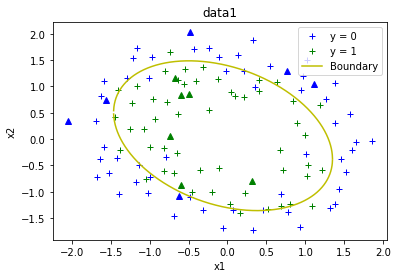

Total Errors in 10% examples:  0.0 %
Total Errors in all examples:  13.559322033898304 %


In [0]:
################## Q.2b ####################

import numpy as np
import pylab as plt
import pandas as pd
import random as rd
dt=1e-9

def h(t,x):
    return 1/(1+(np.exp(-np.matmul(t,np.transpose(x)))))

def gradient_st(t0,n,a,x,y):
    c=0
    while n:
        j = rd.randint(0,len(x)-1)
        t1 = t0 - (a*np.array([-x[j][i]*(y[j]-h(t0,x[j])) for i in range(len(t0))]))
        c+=1
        if abs(np.sum(t1-t0))<1e-100:
            print("Total iteraions = ",c)
            return t1#(t1,c)
        t0 = t1
        n-=1
    print("Total iteraions = ",c)
    return t0#(t0,c)


d=pd.read_csv('data2.csv')
td=d.sample(frac=0.9) 
dd=d.drop(td.index)

tx=np.transpose(np.array([td['x1'],td['x2']]))
dx=np.transpose(np.array([dd['x1'],dd['x2']]))

tx = (tx - np.mean(tx))/np.std(tx)
dx = (dx - np.mean(dx))/np.std(dx)

tx=np.transpose(np.array([tx[:,0],tx[:,1],tx[:,0]**2,tx[:,1]**2,np.multiply(tx[:,0],tx[:,1])]))
dx=np.transpose(np.array([dx[:,0],dx[:,1],dx[:,0]**2,dx[:,1]**2,np.multiply(dx[:,0],dx[:,1])]))

ty=np.transpose(np.array([td['y']]))
dy=np.transpose(np.array([dd['y']]))


one=np.transpose(np.array([[1 for i in range(len(tx))]]))
tx=np.concatenate((one,tx),axis=1)
one=np.transpose(np.array([[1 for i in range(len(dx))]]))
dx=np.concatenate((one,dx),axis=1)

clas=2
m=tx.shape[0]

#Visualizing Graph
color=['b+','g+']
my_label=['y = '+str(i) for i in range(clas)]
for i in range(m):
    plt.plot(tx[i][1],tx[i][2],color[ty[i,0]],label=my_label[ty[i,0]])
    my_label[ty[i,0]]='_nolegend_'

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('data1')

#Stochastic Gradient Descent:
t0=np.array([0.5]*6)
a=0.01
n=1e5                  

th = gradient_st(np.copy(t0),n,a,tx,ty[:,0])
t_best=np.array([th])
print(th)
t=np.linspace(-3,3,5000)

a = th[4]
b = th[2]+th[5]*t
c = th[0]+th[1]*t+th[3]*(t**2) 
d = (b**2 - 4*a*c)

d = d**0.5

y = (-b + d)/(2*a)
plt.plot(t,y,'y',label='Boundary')
y = (-b - d)/(2*a)
plt.plot(t,y,'y')

e=0
color=['b^','g^']
for pp in range(len(dx)):
    dp=np.array([dx[pp]])
    ht=np.matmul(t_best,np.transpose(dp))
    yp=1 if dy[pp,0]==1 else -1 
    if ht*yp<0 :
        plt.plot(dx[pp][1],dx[pp][2],'r^')
        e+=1
    else:
        plt.plot(dx[pp][1],dx[pp][2],color[dy[pp,0]])
plt.legend(loc='best')
plt.show()
print(r"Total Errors in 10% examples: ",(e*100)/dx.shape[0],"%")

for pp in range(len(tx)):
    dp=np.array([tx[pp]])
    ht=np.matmul(t_best,np.transpose(dp))
    yp=1 if ty[pp]==1 else -1 
    if ht*yp<0 :e+=1
print(r"Total Errors in all examples: ",(e*100)/(dx.shape[0]+tx.shape[0]),"%")

Total iteraions =  70000


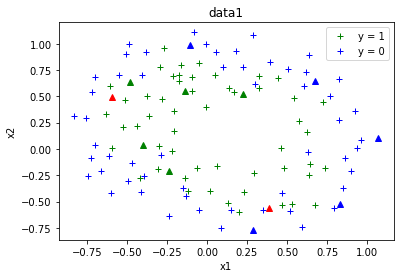

Total Errors in 10% examples:  16.666666666666668 %
Total Errors in all examples:  16.949152542372882 %


In [0]:
################## Q.2b-extra ####################

import numpy as np
import pylab as plt
import pandas as pd
import random as rd
dt=1e-9

def h(t,x):
    return 1/(1+(np.exp(-np.matmul(t,np.transpose(x)))))

def gradient_st(t0,n,a,x,y):
    c=0
    while n:
        j = rd.randint(0,len(x)-1)
        t1 = t0 - (a*np.array([-x[j][i]*(y[j]-h(t0,x[j])) for i in range(len(t0))]))
        c+=1
        if abs(np.sum(t1-t0))<1e-100:
            print("Total iteraions = ",c)
            return t1#(t1,c)
        t0 = t1
        n-=1
    print("Total iteraions = ",c)
    return t0#(t0,c)


d=pd.read_csv('data2.csv')
td=d.sample(frac=0.9) 
dd=d.drop(td.index)

tx=np.transpose(np.array([td['x1'],td['x2'],td['x1']**2,td['x2']**2,np.multiply(td['x1'],td['x2']),td['x1']**3,td['x2']**3,np.multiply(td['x1'],td['x2']**2),np.multiply(td['x2'],td['x1']**2)]))
dx=np.transpose(np.array([dd['x1'],dd['x2'],dd['x1']**2,dd['x2']**2,np.multiply(dd['x1'],dd['x2']),dd['x1']**3,dd['x2']**3,np.multiply(dd['x1'],dd['x2']**2),np.multiply(dd['x2'],dd['x1']**2)]))

ty=np.transpose(np.array([td['y']]))
dy=np.transpose(np.array([dd['y']]))

#tx = (tx - np.mean(tx))/np.std(tx)
#dx = (dx - np.mean(dx))/np.std(dx)

one=np.transpose(np.array([[1 for i in range(len(tx))]]))
tx=np.concatenate((one,tx),axis=1)
one=np.transpose(np.array([[1 for i in range(len(dx))]]))
dx=np.concatenate((one,dx),axis=1)

clas=2
m=tx.shape[0]

#Visualizing Graph
color=['b+','g+']
my_label=['y = '+str(i) for i in range(clas)]
for i in range(m):
    plt.plot(tx[i][1],tx[i][2],color[ty[i,0]],label=my_label[ty[i,0]])
    my_label[ty[i,0]]='_nolegend_'

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('data1')

#Stochastic Gradient Descent:
t0=np.array([0.5]*10)
a=0.01
n=70000                  

th = gradient_st(np.copy(t0),n,a,tx,ty[:,0])
t_best=np.array([th])

#t=np.linspace(-3,3,5000)

#a = th[4]
#b = th[2]+th[5]*t
#c = th[0]+th[1]*t+th[3]*(t**2) 
#d = (b**2 - 4*a*c)
#d = d**0.5

#y = (-b + d)/(2*a)
#plt.plot(t,y,'y',label='Boundary')
#y = (-b - d)/(2*a)
#plt.plot(t,y,'y')

e=0
color=['b^','g^']
for pp in range(len(dx)):
    dp=np.array([dx[pp]])
    ht=np.matmul(t_best,np.transpose(dp))
    yp=1 if dy[pp,0]==1 else -1 
    if ht*yp<0 :
        plt.plot(dx[pp][1],dx[pp][2],'r^')
        e+=1
    else:
        plt.plot(dx[pp][1],dx[pp][2],color[dy[pp,0]])
plt.legend(loc='best')
plt.show()
print(r"Total Errors in 10% examples: ",(e*100)/dx.shape[0],"%")

for pp in range(len(tx)):
    dp=np.array([tx[pp]])
    ht=np.matmul(t_best,np.transpose(dp))
    yp=1 if ty[pp]==1 else -1 
    if ht*yp<0 :e+=1
print(r"Total Errors in all examples: ",(e*100)/(dx.shape[0]+tx.shape[0]),"%")